# Advanced NLP
- word2vec
- doc2vec
- RNN

## Basic pipeline

### Read and clean:

In [1]:
# Read in, clean, and vectorize data
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('./spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### RandomForestClassifier

In [2]:
# Import Random Forest for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Import the methods that will be needed to evaluate a basic model
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['label'],
                                                    test_size=0.2)

In [5]:
# Fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [6]:
# Make predictions on the test set using the fit model
y_pred = rf_model.predict(X_test)

In [7]:
# Evalute model predictions using precision and recall
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 1.0 / Recall: 0.805


## word2vec

word2vec is a shallow, 2-layer neural network that accepts a text corpus as an input, and it returns a set of vectors (also known as embeddings); each vector is a numeric representatiopn of a given word.

*"You shall know the word by the company it keeps."*

### uses "Cosine similarity"

$\vec{Queen} = \vec{King} - \vec{Man} + \vec{Woman}$

### Explore Pre-trained Embeddings

Some other options:
- `glove-twitter-{25/50/100/200}`
- `glove-wiki-gigaword-{50/200/300}`
- `word2vec-google-news-300`
- `word2vec-ruscorpora-news-300`

In [8]:
# Load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

In [9]:
# Explore the word vector for "king"
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [10]:
# Find the words most similar to king based on the trained word vectors
wiki_embeddings.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020887732505798),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811410188674927),
 ('father', 0.680202841758728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

### Train our own model

In [11]:
# Read in the data and clean up column names
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('./spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [12]:
# Clean data using the built in cleaner in gensim
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

In [17]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [18]:
# Explore the word vector for "king" base on our trained model
w2v_model.wv['king']

array([ 8.22794437e-02,  7.15377703e-02,  1.13073792e-02, -6.92935893e-04,
       -5.78757329e-03, -2.24397099e-03,  3.08556780e-02,  1.28532007e-01,
       -4.49366197e-02,  1.40099856e-03,  9.39837322e-02,  9.83330309e-02,
        2.96608564e-02,  1.88523494e-02,  7.69960880e-02, -2.38459632e-02,
       -2.20810138e-02, -4.47637960e-02, -3.52773368e-02, -3.94348390e-02,
        2.40708720e-02,  3.34583744e-02,  9.19674989e-03, -6.58849776e-02,
        3.25308107e-02,  7.00966362e-03, -1.93505250e-02, -7.13438392e-02,
       -5.31851910e-02, -1.93836279e-02, -5.48255108e-02, -4.52534631e-02,
       -1.12883314e-01, -4.39974666e-02, -3.12781222e-02,  3.94870266e-02,
        2.48225518e-02,  1.02029257e-01,  1.68355368e-02, -2.96352208e-02,
       -4.72212359e-02, -1.04903663e-02,  2.51805969e-02,  4.88484688e-02,
        3.09625524e-03,  4.78431545e-02,  1.08772004e-02,  3.26122977e-02,
       -8.82226601e-02, -8.90500620e-02, -7.91083947e-02,  7.29472116e-02,
       -2.14259792e-02,  

In [19]:
# Find the most similar words to "king" based on word vectors from our trained model
w2v_model.wv.most_similar('king')

[('sex', 0.9987980127334595),
 ('then', 0.9987930059432983),
 ('same', 0.9987838268280029),
 ('sms', 0.9987767934799194),
 ('stuff', 0.9987733960151672),
 ('of', 0.9987660050392151),
 ('but', 0.9987635612487793),
 ('even', 0.9987606406211853),
 ('see', 0.9987546801567078),
 ('real', 0.9987517595291138)]

### Prep word vectors

In [21]:
# Generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index2word

['you',
 'to',
 'the',
 'and',
 'in',
 'is',
 'my',
 'me',
 'it',
 'for',
 'your',
 'of',
 'call',
 'have',
 'that',
 'on',
 'are',
 'now',
 'not',
 'can',
 'but',
 'so',
 'or',
 'do',
 'we',
 'at',
 'with',
 'be',
 'get',
 'if',
 'will',
 'ur',
 'just',
 'no',
 'this',
 'up',
 'gt',
 'lt',
 'how',
 'free',
 'when',
 'from',
 'what',
 'ok',
 'all',
 'go',
 'know',
 'out',
 'll',
 'like',
 'good',
 'day',
 'am',
 'got',
 'was',
 'come',
 'he',
 'its',
 'there',
 'then',
 'only',
 'time',
 'love',
 'text',
 'want',
 'send',
 'as',
 'txt',
 'one',
 'see',
 'by',
 'need',
 'about',
 'lor',
 'today',
 'going',
 'home',
 'she',
 'stop',
 'still',
 'sorry',
 'da',
 'don',
 'our',
 'reply',
 'back',
 'please',
 'tell',
 'dont',
 'new',
 'pls',
 'later',
 'did',
 'they',
 'mobile',
 'her',
 'hi',
 'phone',
 'think',
 'week',
 'take',
 'any',
 'well',
 'been',
 'dear',
 'some',
 'where',
 're',
 'him',
 'here',
 'has',
 'who',
 'msg',
 'happy',
 'an',
 'ì_',
 'oh',
 'hope',
 'too',
 'more',
 'mu

In [23]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word])
                     for ls in X_test], dtype=object)

In [24]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

14 14
7 7
6 6
13 13
8 7
16 15
6 4
17 15
7 6
6 6
6 6
26 23
4 4
25 25
11 11
22 22
19 14
27 27
10 9
29 28
2 2
7 7
17 17
8 8
4 4
9 9
6 5
11 11
5 4
9 7
21 16
10 10
9 9
27 27
8 8
6 3
7 6
2 2
24 19
29 26
9 8
21 19
6 5
6 6
22 18
24 21
11 10
7 6
33 31
7 7
41 36
20 19
22 18
23 23
17 17
9 8
6 6
16 16
12 12
11 10
41 34
5 5
3 3
24 23
18 16
9 9
8 7
30 30
23 23
8 8
29 27
33 32
10 10
12 12
29 29
5 5
13 13
4 3
6 6
24 24
16 15
3 1
9 9
15 11
15 13
12 11
7 7
11 11
6 6
1 1
19 18
13 12
6 6
14 14
5 4
23 23
8 7
25 24
17 17
4 2
17 17
10 9
5 5
10 9
13 11
6 6
9 7
17 16
14 14
13 10
32 31
23 22
22 21
23 22
9 9
18 16
21 18
7 7
16 12
22 22
16 16
8 7
8 8
24 14
30 25
8 8
25 19
6 6
5 5
5 5
2 2
7 7
29 28
5 5
8 8
6 6
25 25
26 25
23 23
8 8
13 13
22 22
13 12
8 7
5 5
15 15
14 14
13 12
11 9
31 31
23 21
36 35
7 5
30 30
4 4
9 6
15 14
7 6
16 16
1 1
10 8
19 18
25 20
7 7
16 12
3 2
44 41
8 5
17 16
81 79
11 11
47 40
6 5
73 69
7 7
7 7
14 13
20 19
16 12
11 10
9 8
18 17
11 11
17 17
7 4
7 6
22 21
17 17
7 7
23 21
4 4
5 5
3 3
5 5
9 7
3 3

In [25]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect)!=0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [26]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

14 100
7 100
6 100
13 100
8 100
16 100
6 100
17 100
7 100
6 100
6 100
26 100
4 100
25 100
11 100
22 100
19 100
27 100
10 100
29 100
2 100
7 100
17 100
8 100
4 100
9 100
6 100
11 100
5 100
9 100
21 100
10 100
9 100
27 100
8 100
6 100
7 100
2 100
24 100
29 100
9 100
21 100
6 100
6 100
22 100
24 100
11 100
7 100
33 100
7 100
41 100
20 100
22 100
23 100
17 100
9 100
6 100
16 100
12 100
11 100
41 100
5 100
3 100
24 100
18 100
9 100
8 100
30 100
23 100
8 100
29 100
33 100
10 100
12 100
29 100
5 100
13 100
4 100
6 100
24 100
16 100
3 100
9 100
15 100
15 100
12 100
7 100
11 100
6 100
1 100
19 100
13 100
6 100
14 100
5 100
23 100
8 100
25 100
17 100
4 100
17 100
10 100
5 100
10 100
13 100
6 100
9 100
17 100
14 100
13 100
32 100
23 100
22 100
23 100
9 100
18 100
21 100
7 100
16 100
22 100
16 100
8 100
8 100
24 100
30 100
8 100
25 100
6 100
5 100
5 100
2 100
7 100
29 100
5 100
8 100
6 100
25 100
26 100
23 100
8 100
13 100
22 100
13 100
8 100
5 100
15 100
14 100
13 100
11 100
31 100
23 100
36 100


## doc2vec

doc2vec is a shallow, 2-layer neural network that accepts a text corpus as an input, and it returns a set of vectors (also known as embeddings); each vector is a numeric representation of a given sentence, paragraph, or document.

### Train our own model (for doc2vec)

In [27]:
# Read in data, clean it, and then split into train and test sets
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('./spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

In [28]:
# Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [29]:
# Look at what a tagged document looks like
tagged_docs[0]

TaggedDocument(words=['customer', 'place', 'will', 'call', 'you'], tags=[0])

In [30]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [31]:
# What happens if we pass in a single word like we did for word2vec?
d2v_model.infer_vector('text')

TypeError: Parameter doc_words of infer_vector() must be a list of strings (not a single string).

In [32]:
# What happens if we pass in a list of words?
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([ 8.7209214e-03,  6.8003386e-03,  5.5952729e-03, -2.5766229e-03,
        1.0613035e-03, -5.7215425e-03, -1.6412719e-03,  8.1747035e-03,
        2.0160328e-03,  5.2075079e-03,  1.0162117e-02,  6.0933977e-03,
       -4.4398084e-03, -4.7933441e-04,  9.7119426e-03, -3.4393093e-03,
        4.7703446e-03,  4.0532406e-03, -6.3246160e-05, -2.0210417e-03,
        1.7368731e-03,  3.4384518e-03,  4.7413744e-03, -2.3204719e-03,
        5.5889967e-03, -2.0065054e-03,  3.3309052e-03, -2.0756924e-03,
       -8.9801941e-03,  4.3926477e-03, -4.4796076e-03, -4.1491329e-03,
       -1.0473067e-02, -2.9401588e-03, -4.6068169e-03, -1.4974561e-03,
        5.9022271e-04,  6.7550489e-03, -4.1296746e-04, -7.9409238e-03,
       -4.4584284e-03, -6.1357087e-03,  5.5976193e-03,  6.2380014e-03,
        7.1805198e-04,  2.6298431e-03,  6.6803750e-03, -6.1393570e-05,
       -6.8914797e-03, -8.8394256e-03, -2.6981505e-03,  6.0479343e-03,
       -5.8431751e-03,  4.6421327e-03,  6.5076486e-03,  9.4151357e-03,
      

### What About Pre-trained Document Vectors?

There are not as many options as there are for word vectors. There also is not an easy API to read these in like there is for `word2vec` so it is more time consuming.

Pre-trained vectors from training on Wikipedia and Associated Press News can be found [here](https://github.com/jhlau/doc2vec). Feel free to explore on your own!

## Deep Learning - based Vector model

> When you hear the term deep learning, just think of a large deep neural net. Deep referes to the number of layers typically as so this kind of the popular term that's been adopted in the press. I think of them as deep neural networks generally.

\- **Jeff Dean**, Google Senior Fellow in Systems and Infra. Group

## Recurrent Neural Network (RNN)

Pattern matchin through the connection of many very simple functions to create one very powerful function; **this function has an understanding of the data's sequential nature (using feedback loops that form a sense of memory)**

### Implement basic RNN

#### Read, clean and split the data:

In [33]:
# Read in data and split into training and test set
# NOTE: we are NOT cleaning the data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('./spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages['label']=='spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size=0.2)

#### Prep data for modelling:

In [34]:
# Import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [35]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [36]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [37]:
# What do these sequences look like?
X_train_seq[0]

[3,
 17,
 1277,
 2566,
 72,
 2567,
 716,
 8,
 28,
 2568,
 171,
 7,
 806,
 1662,
 45,
 44,
 2,
 871,
 2569,
 15,
 2570,
 27,
 23,
 1131,
 26,
 2571,
 1662,
 2,
 633]

In [38]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [39]:
# What do these padded sequences look like?
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
         17, 1277, 2566,   72, 2567,  716,    8,   28, 2568,  171,    7,
        806, 1662,   45,   44,    2,  871, 2569,   15, 2570,   27,   23,
       1131,   26, 2571, 1662,    2,  633], dtype=int32)

#### Build model:

In [40]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [42]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          254848    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 264,257
Trainable params: 264,257
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [44]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 5s 20ms/step - loss: 0.4555 - accuracy: 0.8589 - precision_m: 0.1295 - recall_m: 0.0910 - val_loss: 0.0603 - val_accuracy: 0.9874 - val_precision_m: 0.9800 - val_recall_m: 0.9359
Epoch 2/10
140/140 [==============================] - 2s 15ms/step - loss: 0.0450 - accuracy: 0.9913 - precision_m: 0.9821 - recall_m: 0.9585 - val_loss: 0.0473 - val_accuracy: 0.9874 - val_precision_m: 1.0000 - val_recall_m: 0.9183
Epoch 3/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0183 - accuracy: 0.9963 - precision_m: 0.9942 - recall_m: 0.9802 - val_loss: 0.0273 - val_accuracy: 0.9910 - val_precision_m: 0.9850 - val_recall_m: 0.9609
Epoch 4/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0096 - accuracy: 0.9976 - precision_m: 0.9793 - recall_m: 0.9721 - val_loss: 0.0277 - val_accuracy: 0.9937 - val_precision_m: 0.9964 - val_recall_m: 0.9681
Epoch 5/10
140/140 [==============================] - 2s 16ms/step -

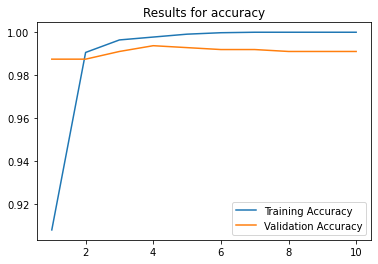

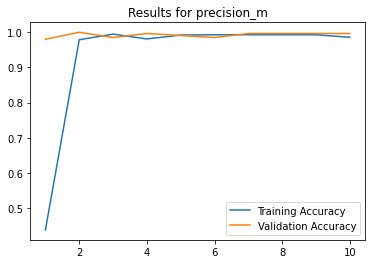

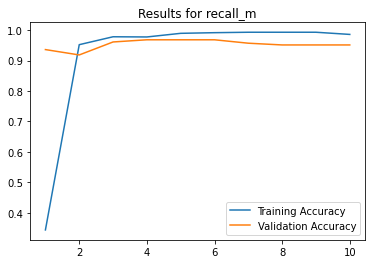

In [45]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

## Comparing the NLP Techniques

### Preparing the data for modelling:

In [46]:
# Read in and clean data
import nltk
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('./spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['label'] = np.where(messages['label']=='spam', 1, 0)

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))
messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [47]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'],
                                                    messages['label'], test_size=0.2)

In [48]:
# What do the first ten messages in the training set look like?
X_train[:]

4081                                                                                                                                                                                      [check, rooms, befor, activities]
4455                                                                                                                                                                 [want, mapquest, something, look, usf, dogwood, drive]
1442                                                                                                                                                                                                [ok, askd, u, knw, tht]
4317                                                                                                                                                                                             [si, take, mokka, players]
4915                                                                                                                    

In [49]:
# What do the labels look like?
y_train[:10]

4081    0
4455    0
1442    0
4317    0
4915    0
4199    0
3733    0
3921    0
244     0
2099    1
Name: label, dtype: int64

In [50]:
# Let's save the training and test sets to ensure we are using the same data for each model
X_train.to_csv('./spam_X_train.csv', index=False, header=True)
X_test.to_csv('./spam_X_test.csv', index=False, header=True)
y_train.to_csv('./spam_y_train.csv', index=False, header=True)
y_test.to_csv('./spam_y_test.csv', index=False, header=True)

In [52]:
# Load the cleaned training and test sets
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv('./spam_X_train.csv')
X_test = pd.read_csv('./spam_X_test.csv')
y_train = pd.read_csv('./spam_y_train.csv')
y_test = pd.read_csv('./spam_y_test.csv')

X_train.head()

,clean_text
0,"['check', 'rooms', 'befor', 'activities']"
1,"['want', 'mapquest', 'something', 'look', 'usf', 'dogwood', 'drive']"
2,"['ok', 'askd', 'u', 'knw', 'tht']"
3,"['si', 'take', 'mokka', 'players']"
4,"['dropped', 'em', 'omw', 'back']"


### Build Model on TF-IDF Vectors

#### Create TF-IDF Vectors

In [53]:
# Instantiate and fit a TFIDF vectorizer and then use that trained vectorizer
# to transform the messages in the training and test sets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])
X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [54]:
# What words did the vectorizer learn?
tfidf_vect.vocabulary_

{'check': 1879,
 'rooms': 6196,
 'befor': 1389,
 'activities': 878,
 'want': 7806,
 'mapquest': 4643,
 'something': 6702,
 'look': 4476,
 'usf': 7649,
 'dogwood': 2560,
 'drive': 2623,
 'ok': 5251,
 'askd': 1185,
 'knw': 4233,
 'tht': 7302,
 'si': 6527,
 'take': 7105,
 'mokka': 4864,
 'players': 5584,
 'dropped': 2630,
 'em': 2741,
 'omw': 5273,
 'back': 1285,
 'come': 2039,
 'tomorrow': 7385,
 'di': 2451,
 'tacos': 7095,
 'rajas': 5920,
 'burrito': 1668,
 'right': 6155,
 'oh': 5244,
 'really': 5975,
 'perform': 5483,
 'write': 8060,
 'paper': 5406,
 'go': 3346,
 'movie': 4913,
 'home': 3692,
 'midnight': 4771,
 'huh': 3779,
 'dont': 2575,
 'remember': 6053,
 'old': 5267,
 'commercial': 2051,
 'sms': 6658,
 'services': 6411,
 'inclusive': 3879,
 'text': 7209,
 'credits': 2210,
 'pls': 5600,
 'goto': 3403,
 'wwwcomuknet': 8090,
 'login': 4459,
 'unsubscribe': 7604,
 'stop': 6902,
 'extra': 2902,
 'charge': 1857,
 'help08700469649': 3605,
 'po': 5610,
 'box420': 1564,
 'ip4': 3968,
 '5we

In [55]:
# How are these vectors stored?
X_test_vect[0]

<1x8261 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [56]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

#### Fit Random Forest on top of the Vectors

In [57]:
# Fit a basic Random Forest model on these vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [58]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect)

In [59]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.844 / Accuracy: 0.978


### Build Model on word2vec Vectors

#### Create word2vec Vectors:

In [60]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [62]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index2word)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train['clean_text']], dtype=object)
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test['clean_text']], dtype=object)

In [63]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [64]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[-6.6968979e-04,  3.4578454e-03, -1.9382305e-03, -4.7058719e-03,
         8.4614201e-04,  4.6616262e-03, -4.0404024e-03, -1.1704107e-03,
         3.0704867e-03,  1.5583877e-03,  3.3804949e-03,  4.1575865e-03,
        -1.5612100e-03,  2.3194156e-03, -7.7056163e-04, -3.4185851e-03,
         3.5160559e-04, -3.5576052e-03,  4.8053745e-04,  3.7461736e-03,
         6.0713897e-04,  4.0740389e-03,  3.7846118e-04, -1.5000689e-03,
        -1.0904194e-03,  2.2046040e-03, -5.0984434e-04,  1.0602624e-03,
        -3.0403486e-03,  1.5716453e-03, -3.1102828e-03, -2.1210681e-03,
         4.0272968e-03, -4.9504573e-03,  4.5761131e-03, -3.6794741e-03,
         1.3706160e-03,  2.3739457e-03, -2.3900673e-03, -4.9112695e-03,
        -1.2181470e-03,  3.6860681e-03,  1.0023477e-03,  3.6847258e-03,
        -1.4831536e-06, -1.4131200e-03,  1.6984355e-03, -3.0945004e-03,
         8.0331997e-04,  2.3724432e-03, -2.5922146e-03,  2.9519580e-03,
         4.0643511e-04,  1.0249075e-03, -4.5913369e-03, -4.75659

In [65]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([ 1.3376072e-03,  1.2321254e-03, -2.9674280e-03, -1.9786519e-03,
       -1.0107368e-03,  4.2014113e-03, -4.4022785e-03, -4.5357436e-05,
        9.4695931e-04,  2.1875503e-03,  2.9595757e-03,  1.6927276e-03,
       -2.1193991e-03,  8.8273856e-04,  2.3224624e-05, -3.6712303e-03,
       -4.8092232e-04, -1.8950205e-03, -8.7560696e-04,  3.1149844e-03,
       -2.3534018e-04,  1.8457010e-03,  9.5163391e-04, -1.1245407e-03,
        7.4835139e-04, -2.6810885e-04, -8.4531168e-04,  2.3883999e-06,
       -2.4441506e-03,  9.6667337e-04, -1.8847368e-03, -2.4582488e-03,
        2.6658701e-03, -4.2461157e-03,  4.0823189e-03, -2.9736778e-03,
        1.7738100e-03,  5.6874048e-04,  2.3354185e-04, -3.0289697e-03,
        1.2912329e-04,  2.8295666e-03, -2.9075009e-04,  1.6456067e-03,
       -9.4111514e-04, -4.6934225e-04,  1.4026691e-04, -3.3538684e-03,
       -3.2574483e-04,  2.3516689e-03, -3.2298726e-03,  1.8084064e-03,
        7.8597141e-04,  1.7537087e-03, -1.4621662e-03, -4.1228598e-03,
      

#### Fit RandomForestClassifier on top of word2vec Vectors:

In [66]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [67]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [68]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.564 / Recall: 0.201 / Accuracy: 0.868


### Build Model on doc2vec Vectors

#### Creating doc2vec Vectors:

In [69]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train['clean_text'])]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test['clean_text'])]

In [70]:
# What do these TaggedDocument objects look like?
tagged_docs_train[:10]

[TaggedDocument(words="['check', 'rooms', 'befor', 'activities']", tags=[0]),
 TaggedDocument(words="['want', 'mapquest', 'something', 'look', 'usf', 'dogwood', 'drive']", tags=[1]),
 TaggedDocument(words="['ok', 'askd', 'u', 'knw', 'tht']", tags=[2]),
 TaggedDocument(words="['si', 'take', 'mokka', 'players']", tags=[3]),
 TaggedDocument(words="['dropped', 'em', 'omw', 'back']", tags=[4]),
 TaggedDocument(words="['come', 'tomorrow', 'di']", tags=[5]),
 TaggedDocument(words="['4', 'tacos', '1', 'rajas', 'burrito', 'right']", tags=[6]),
 TaggedDocument(words="['oh', 'really', 'perform', 'write', 'paper', 'go', 'movie', 'home', 'midnight', 'huh']", tags=[7]),
 TaggedDocument(words="['u', 'dont', 'remember', 'old', 'commercial']", tags=[8]),
 TaggedDocument(words="['sms', 'services', 'inclusive', 'text', 'credits', 'pls', 'goto', 'wwwcomuknet', 'login', 'unsubscribe', 'stop', 'extra', 'charge', 'help08700469649', 'po', 'box420', 'ip4', '5we']", tags=[9])]

In [71]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [72]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

#### Fit RandomForestClassifier on top of Document Vectors:

In [73]:
# Fit a basic model, make predictions on the holdout test set, and the generate the evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()
rf_model = rf.fit(train_vectors, y_train.values.ravel())

y_pred = rf_model.predict(test_vectors)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.753 / Recall: 0.357 / Accuracy: 0.895


### Build basic RNN

#### Prep the data for RNN:

In [74]:
# Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [75]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

#### Build and Evaluate RNN:

In [76]:
# Import the tools needed and use our previously defined functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [77]:
# Construct our basic RNN model framework
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          265472    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 274,881
Trainable params: 274,881
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [79]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train['label'], 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 4s 18ms/step - loss: 0.3911 - accuracy: 0.8869 - precision_m: 0.1831 - recall_m: 0.1264 - val_loss: 0.0927 - val_accuracy: 0.9848 - val_precision_m: 0.9871 - val_recall_m: 0.9157
Epoch 2/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0513 - accuracy: 0.9903 - precision_m: 0.9870 - recall_m: 0.9338 - val_loss: 0.0501 - val_accuracy: 0.9883 - val_precision_m: 1.0000 - val_recall_m: 0.9252
Epoch 3/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0097 - accuracy: 0.9976 - precision_m: 0.9960 - recall_m: 0.9889 - val_loss: 0.0431 - val_accuracy: 0.9892 - val_precision_m: 0.9786 - val_recall_m: 0.9448
Epoch 4/10
140/140 [==============================] - 2s 15ms/step - loss: 0.0051 - accuracy: 0.9980 - precision_m: 0.9846 - recall_m: 0.9855 - val_loss: 0.0551 - val_accuracy: 0.9901 - val_precision_m: 0.9929 - val_recall_m: 0.9407
Epoch 5/10
140/140 [==============================] - 2s 16ms/step -

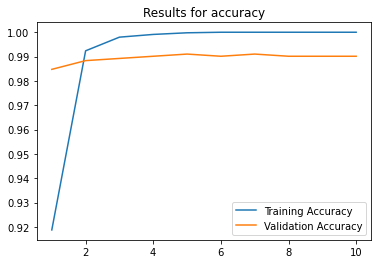

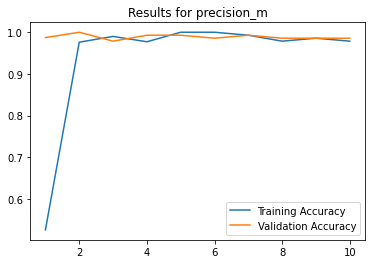

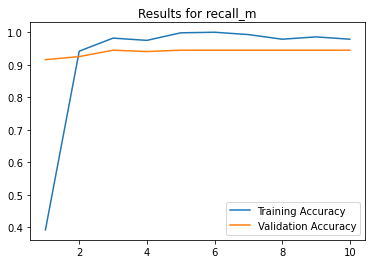

In [80]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()